# **# Physics of NFL Passing Pocket**

In [28]:
#pip installs if needed



In [55]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from functools import partial
from matplotlib.animation import writers
import os

#%matplotlib inline

In [56]:
# Import from GoogleDrive

from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("//content/gdrive/MyDrive/nfl-big-data-bowl-2023/")

data_dir = "/content/gdrive/My Drive/nfl-big-data-bowl-2023/"
save_dir = "/content/gdrive/My Drive/nfl-big-data-bowl-2023/charts/"
#if on kaggle
#data_dir = "/kaggle/input/nfl-big-data-bowl-2023/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:


# Read In csvs
games = pd.read_csv(data_dir + "games.csv")
plays = pd.read_csv(data_dir + "plays.csv")
players = pd.read_csv(data_dir + "players.csv")
week1 = pd.read_csv(data_dir + "week1.csv")
week2 = pd.read_csv(data_dir + "week2.csv")
week3 = pd.read_csv(data_dir + "week3.csv")
week4 = pd.read_csv(data_dir + "week4.csv")
week5 = pd.read_csv(data_dir + "week5.csv")
week6 = pd.read_csv(data_dir + "week6.csv")
week7 = pd.read_csv(data_dir + "week7.csv")
week8 = pd.read_csv(data_dir + "week8.csv")
pffScoutingData = pd.read_csv(data_dir + "pffScoutingData.csv")

joined_all = pd.merge(games,plays,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,week1,how="inner",on=["gameId","playId"])
# left join on players to keep football records
joined_all = pd.merge(joined_all,players,how="left",on = "nflId")

play_focus = 97
focused_df = joined_all[(joined_all.playId==play_focus)]

print(len(plays))

8558


In [32]:
import sqlite3

#from sqlalchemy import create_engine
#my_conn=create_engine("sqlite:////content/drive/MyDrive/my_db/my_db.db")

# Create a SQL connection to a local SQLite database
con = sqlite3.connect(data_dir + "databowl.db")

# Add dataframes as tables in this database
#static information 
#games.to_sql("games", con, index=False, if_exists='replace')
#plays.to_sql("plays", con, index=False, if_exists='replace')
#players.to_sql("players", con, index=False, if_exists='replace')
#pffScoutingData.to_sql("pffScoutingData", con, index=False, if_exists='replace')

#tracking data
#week1.to_sql("week1", con, index=False, if_exists='replace')
#week2.to_sql("week2", con, index=False, if_exists='replace')
#week3.to_sql("week3", con, index=False, if_exists='replace')
#week4.to_sql("week4", con, index=False, if_exists='replace')
#week5.to_sql("week5", con, index=False, if_exists='replace')
#week6.to_sql("week6", con, index=False, if_exists='replace')
#week7.to_sql("week7", con, index=False, if_exists='replace')
#week8.to_sql("week8", con, index=False, if_exists='replace')


In [33]:
#tracing player paths by x,y 
#  https://www.kaggle.com/code/aaronzpearson/modelling-speed-curves-from-nfl-data

#nfl analytics
#  https://operations.nfl.com/gameday/analytics/stats-articles/
#  https://operations.nfl.com/gameday/analytics/big-data-bowl/past-big-data-bowl-recaps/

#calculating the convex hull for pass protectors
#  https://medium.com/@harshitsikchi/convex-hulls-explained-baab662c4e94
#  https://www.oreilly.com/library/view/python-cookbook/0596001673/ch17s19.html
#  https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

#voronoi spaces for blockers and qb
#  https://en.wikipedia.org/wiki/Voronoi_diagram

#scipy spatial
#  https://docs.scipy.org/doc/scipy/reference/spatial.html

#plot lines of trajectory
#https://plotly.com/python/line-charts/

#  https://github.com/tuckerboynton22/nflfastr_app
#  https://nflfastr-app.herokuapp.com/index?



In [34]:
################# Individual Play Data #########################################
#play data by gameId and playId

def play_in_game(play_id, game_id):  
    sql = "SELECT * FROM plays WHERE (plays.playId='" + str(play_id) + "') AND (plays.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    print(len(query))
    return query
'''
#Testing
playdata = play_in_game(97, 2021090900)

print("all plays from function")
print(type(playdata))
'''



'\n#Testing\nplaydata = play_in_game(97, 2021090900)\n\nprint("all plays from function")\nprint(type(playdata))\n'

In [35]:

#scouting data by gameId and playId

def scouting_in_game(play_id, game_id):  
    #sql = "SELECT * FROM plays WHERE (plays.playId='" + str(play_id) + "') AND (plays.gameId=" + str(game_id) + ")"
    sql = "SELECT * FROM pffScoutingData WHERE (pffScoutingData.playId='" + str(play_id) + "') AND (pffScoutingData.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    #print(len(query))
    #print(passdata_allplay)
    return query
'''
#Testing

scoutingdata = scouting_in_game(97, 2021090900)

print("all scouting from function")
print(type(scoutingdata))
'''

'\n#Testing\n\nscoutingdata = scouting_in_game(97, 2021090900)\n\nprint("all scouting from function")\nprint(type(scoutingdata))\n'

In [36]:
#look up the week by gameId

def get_week_by_gameId(game_id): 
    
    sql = "SELECT week FROM games WHERE (games.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    for index, row in query.iterrows():
        week = row["week"]
        
        

    return week
'''
#Testing

week_test = get_week_by_gameId(2021090900)
print(week_test)
'''

'\n#Testing\n\nweek_test = get_week_by_gameId(2021090900)\nprint(week_test)\n'

In [37]:

#tracking data for the play by gameId and playId

def tracking_for_play(week_id, play_id, game_id): 
    
    sql = "SELECT * FROM week" +  str(week_id) + " WHERE (week"+str(week_id)+".playId='" + str(play_id) + "') AND (week"+str(week_id)+".gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    #print(len(query))
    return query
'''
#Testing
trackingdata = tracking_for_play('week1', 97, 2021090900)

print("all tracking for play from function")
print(type(trackingdata))
'''

'\n#Testing\ntrackingdata = tracking_for_play(\'week1\', 97, 2021090900)\n\nprint("all tracking for play from function")\nprint(type(trackingdata))\n'

In [38]:
#all plays per game, sorted by team
def all_plays_per_game(game_id, team):  
    sql = "SELECT * FROM plays WHERE (plays.gameId=" + str(game_id) + ") \
    AND (plays.possessionTeam='" + team + "')"
    query = pd.read_sql_query(sql, con)
    return query

In [39]:
def get_distance(p, q):
    """ 
    Return euclidean distance between points p and q
    assuming both to have the same number of dimensions
    """
    # sum of squared difference between coordinates
    s_sq_difference = 0
    for p_i,q_i in zip(p,q):
        s_sq_difference += (p_i - q_i)**2
    
    # take sq root of sum of squared difference
    distance = s_sq_difference**0.5
    return distance

# check the function
a = (2, 3)
b = (5, 7)
# distance b/w a and b
d = get_distance(a, b)
# display the result
print(d)

#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from scipy.spatial import distance
res = distance.euclidean(a, b)
print(res)

5.0
5.0


In [40]:
def pocket_tracking_vectors(tracking_df, play_df,players, pffScoutingData, gameId, playId, mode): 
    #returns a dataframe with all QB, OF and Defensive Pass Rushers Tracking Info: x,y,o,s,dir etc.
    #mode is to return diff data sets: mode='offense', 'defense', 'all'
    selected_play_df = play_df
    tracking_offense_df = tracking_df.copy()
    tracking_defense_df = tracking_df.copy()
    pffScoutingOffenseData = pffScoutingData.copy()
    pffScoutingDefenseData = pffScoutingData.copy() #don't forget to copy() or original gets altered
    #filter players for Offensive Line and QB Positions
    pffScoutingOffenseData.query("pff_role in ('Pass','Pass Block')", inplace=True) #inplace=True updates the dataframe in place, autoupdates it
    #filter players for Defensive Line
    pffScoutingDefenseData.query("pff_role in ('Pass Rush')", inplace=True) #inplace=True updates the dataframe in place, autoupdates it
   
    print("Offense Players:", len(pffScoutingOffenseData)) 
    print("Defensive Line Players: ", len(pffScoutingDefenseData))
    
    #filter tracking_df so it only contains tracking for players in pffScoutingData
    #creata a list of players by nflId 
    offense_trackers = []
    defense_trackers = []
    
    for index, row in pffScoutingOffenseData.iterrows():
        offense_trackers.append(row["nflId"])
    tracking_offense_df.query("nflId == @offense_trackers", inplace=True) #df.query("Category == @filter_list")

    defense_trackers = []
    for index, row in pffScoutingDefenseData.iterrows():
        defense_trackers.append(row["nflId"])
    tracking_defense_df.query("nflId == @defense_trackers", inplace=True) #df.query("Category == @filter_list")
    
    tracking_offense_df = pd.merge(tracking_offense_df,players,how="left",on = "nflId")
    tracking_offense_df = pd.merge(tracking_offense_df,pffScoutingOffenseData,how="left",on = ["nflId","playId","gameId"])
    tracking_offense_df = pd.merge(tracking_offense_df,selected_play_df,how="left",on = ["playId","gameId"])
    

    tracking_defense_df = pd.merge(tracking_defense_df,players,how="left",on = "nflId")
    tracking_defense_df = pd.merge(tracking_defense_df,pffScoutingDefenseData,how="left",on = ["nflId","playId","gameId"])
    tracking_defense_df = pd.merge(tracking_defense_df,selected_play_df,how="left",on = ["playId","gameId"])
    
    offense_tracking_df = tracking_offense_df
    defense_tracking_df = tracking_defense_df
    
    #concatenate the offense defense tracking into one DF
    if mode == 'all':
        frames = [offense_tracking_df, defense_tracking_df]
    if mode == 'offense':
        frames = [offense_tracking_df]
    if mode == 'defense':
        frames = [defense_tracking_df]
    
    all_tracking_df = pd.concat(frames)

    return all_tracking_df
    
            

'''
#Testing
all_game_plays_team = all_plays_per_game(2021090900, 'TB')
#print(all_game_plays_team)
scouting = scouting_in_game(480, 2021090900)
game_week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(game_week, 480, 2021090900)    
pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 480, 2021090900, 'all')
'''

"\n#Testing\nall_game_plays_team = all_plays_per_game(2021090900, 'TB')\n#print(all_game_plays_team)\nscouting = scouting_in_game(480, 2021090900)\ngame_week = get_week_by_gameId(2021090900)\ntracking = tracking_for_play(game_week, 480, 2021090900)    \npocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 480, 2021090900, 'all')\n"

In [41]:
def get_coords(week, nfl_id, play_id, game_id): 
    
    #sql = "SELECT week FROM games WHERE (games.gameId=" + str(game_id) + ")"
    sql = "select x,y from week" + str(week) + " where nflId ='" + str(nfl_id) + "' and playId = '" + str(play_id) + "' and gameId='" + str(game_id) + "'"
    query = pd.read_sql_query(sql, con)
    
    #iterate and tuplize per row
    coords_tuple = ()
    for index, row in query.iterrows():
        x = row["x"]
        y = row["y"]
        coords = x,y
        #print(x,y)
        
        coords_tuple = list(coords_tuple)
        coords_tuple.append(coords)
        coords_tuple = tuple(coords_tuple)
        #print(coords_tuple)
    #print(coords_tuple) 
    return coords_tuple


def get_coords_at_event(week, nfl_id, play_id, game_id, event): 
    #event is in week(n) table along with x,y coords
    sql = "select nflId, x, y, s, a, dis, o, dir from week" + str(week) + " where nflId ='" + str(nfl_id) + "' and playId = '" + str(play_id) + "' and gameId='" + str(game_id) + "' and event='" + event + "'"
    query = pd.read_sql_query(sql, con)
    
    #iterate and tuplize per row
    coords_tuple = ()
    for index, row in query.iterrows():
        nfl_id = row["nflId"]
        x = row["x"]
        y = row["y"]
        s = row["s"]
        a = row["a"]
        dis = row["dis"]
        o = row["o"]
        res_dir = row["dir"]
        coords = nfl_id,x,y,s,a,dis,o,res_dir
        #print(x,y)
        
        coords_tuple = list(coords_tuple)
        coords_tuple.append(coords)
        #coords_tuple = tuple(coords_tuple)


    #print(coords_tuple) 
    return coords_tuple


'''
game_id = 2021090900
play_id = 480
week = 1
k = 25511

coords = get_coords(week, k, play_id, game_id)
'''

'\ngame_id = 2021090900\nplay_id = 480\nweek = 1\nk = 25511\n\ncoords = get_coords(week, k, play_id, game_id)\n'

# **Kinetics and Kinematics of the Offensive Line and Defensive Line**

In [42]:
'''
cursor_obj = con.cursor()

cursor_obj.execute("DROP TABLE IF EXISTS pocket_metrics")
 
# Creating table
table = """ CREATE TABLE pocket_metrics (
            nflId INT NOT NULL,
            qbId INT NOT NULL,
            qb_x INT NOT NULL,
            qb_y INT NOT NULL,
            gameId INT NOT NULL,
            playId INT NOT NULL,
            role VARCHAR(255),
            x INT NOT NULL,
            y INT NOT NULL,
            euclidean FLOAT
        ); """
 
cursor_obj.execute(table)
'''

'\ncursor_obj = con.cursor()\n\ncursor_obj.execute("DROP TABLE IF EXISTS pocket_metrics")\n \n# Creating table\ntable = """ CREATE TABLE pocket_metrics (\n            nflId INT NOT NULL,\n            qbId INT NOT NULL,\n            qb_x INT NOT NULL,\n            qb_y INT NOT NULL,\n            gameId INT NOT NULL,\n            playId INT NOT NULL,\n            role VARCHAR(255),\n            x INT NOT NULL,\n            y INT NOT NULL,\n            euclidean FLOAT\n        ); """\n \ncursor_obj.execute(table)\n'

In [43]:
def pocket_metric_prep(pocket_tracking, game_id, play_id):

    week = get_week_by_gameId(game_id)
    x_y_coords = pocket_tracking[['nflId','x', 'y']]
    records = x_y_coords.to_records(index=False)
    result = list(records)

    x_y_coords_list = result
    nflIds = []
    for i in x_y_coords_list:
        nflIds.append(i[0])
    
    nflIds = np.array(nflIds)
    nflIds = np.unique(nflIds)
    qb = nflIds[0]
    print("nflids: ", nflIds)
    print("qb: ", nflIds[0])
    qb_x = ""
    qb_y = ""
    qb_tuple = ()
    
    
    metrics = []
    for count,k in enumerate(nflIds):
        nfl_id = k
        #get coords when ball is passed for QB and OL, calculate euclidean distance between QB and each OL when ball passed
        metrics_at_pass = get_coords_at_event(week, nfl_id, play_id, game_id, 'pass_forward')
        metrics.append(metrics_at_pass)
        lineman_tuple = ()
        for j in metrics_at_pass:
            if count==0:
                qb_x = j[1]
                qb_y = j[2]
                qb_tuple = qb_tuple + (qb_x,)
                qb_tuple = qb_tuple + (qb_y,)
            ref_x = j[1]
            ref_y = j[2]
            lineman_tuple = lineman_tuple + (ref_x,)
            lineman_tuple = lineman_tuple + (ref_y,)
            if count > 0:
                euclidian_distance = get_distance(qb_tuple, lineman_tuple)
                print(nfl_id, euclidian_distance)
                #write playId, gameId, nflId, x, y, euclidean to db
                # Create a new record
                cursor = con.cursor()
                sql = "INSERT INTO `pocket_metrics` (`nflId`, `qbId`, `qb_x`, `qb_y`, `gameId`, `playId`, `role`, `x`, `y`, 'euclidean') VALUES (" + str(nfl_id) + ", " + str(qb) + ", " + str(qb_x) +", " + str(qb_y) + ", " + str(game_id) + ", " + str(play_id) + ", 'offense', " + str(ref_x) + ", " + str(ref_y) + ", " + str(euclidian_distance) + ")"
                
                # Execute the query
                cursor.execute(sql)
                # the connection is not autocommited by default. So we must commit to save our changes.
                con.commit()
                
            
#select * from plays, week1 where plays.gameid = 2021090900 AND plays.possessionTeam='TB' and plays.passResult='C' AND plays.playId = week1.playId  AND plays.gameId = week1.gameId

 
#Testing    
all_game_plays_team = all_plays_per_game(2021090900, 'TB')  
scouting = scouting_in_game(480, 2021090900)
week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(week, 480, 2021090900)    
pocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 480, 2021090900, 'offense')
pocket_metric_prep(pocket_tracking, 2021090900, 480)


Offense Players: 6
Defensive Line Players:  4
nflids:  [25511. 40151. 42377. 42404. 46163. 52421.]
qb:  25511.0
40151.0 3.801710141502111
42377.0 1.4903019828209347
42404.0 2.30638244877124
46163.0 3.9341835239347995
52421.0 2.216393466873605


In [44]:
sql = "select min(euclidean) from pocket_metrics WHERE playId=97"
#select avg(euclidean) from pocket_metrics WHERE playId=97 OR playId=2397 OR playID=3655 OR playID=4677 OR playId=480 OR playId=869 OR playID=2032 OR playID=3062 OR playID=4699
#select min(euclidean) from pocket_metrics WHERE playId=97
query = pd.read_sql_query(sql, con)
print(query)

#then group by playId and get mean of euclidean per play

   min(euclidean)
0        3.320858


# **Tracking Speed, Direction, and Orientation**

In [45]:

#  https://bleacherreport.com/articles/1076624-a-scouts-guide-to-grading-offensive-linemen
#  https://www.catapultsports.com/blog/american-football-data-science
    
'''
penaltyYards is negative if against the offense in plays table
pass = 'C' is accurate with penalty on defense
pass = 'I' is not accurate as a I is counted on holding plays

                                foulName1
0                                    None
1                    Illegal Use of Hands
2                                Taunting
3             Defensive Pass Interference
4                       Defensive Holding
5                       Offensive Holding
6           Illegal Block Above the Waist
7                   Intentional Grounding
8             Offensive Pass Interference
9                 Unsportsmanlike Conduct
10                      Defensive Offside
11                      Illegal Formation
12                    Roughing the Passer
13                  Unnecessary Roughness
14                     Illegal Touch Pass
15                   Face Mask (15 Yards)
16              Ineligible Downfield Pass
17                        Illegal Contact
18                       Disqualification
19                Illegal Blindside Block
20  Lowering the Head to Initiate Contact
21                             Chop Block
22                              Low Block
23                          Illegal Shift
24                               Tripping
25                   Illegal Forward Pass
26                   Illegal Substitution
27                         Illegal Motion
28                    Horse Collar Tackle
29                               Clipping


'''
def plays_in_game_by_team( game_id, team, pass_result):
    #game_id (int), play_id (int), team (str) i.e. 'TB', week (int), pass_result (int; 0,1), event: pass_forward, ball_snap

    sql = """select plays.playId, plays.playDescription from plays  
             where plays.gameId = """ + str(game_id) + """
             AND plays.possessionTeam = '"""+ team + """'  
             AND plays.passResult = '"""+pass_result+"""'
             """
    print(sql)
    query = pd.read_sql_query(sql, con)

    
    return query



#get tracking data for each play by passResult
def get_tracking_data(game_id, play_id, team, week, pass_result):
    #game_id (int), play_id (int), team (str) i.e. 'TB', week (int), pass_result (int; 0,1), penalty (int:0,1)
    
    sql = """select plays.passResult, wk.playId, wk.gameId, wk.nflId, wk.frameId, wk.time, wk.x, 
             wk.y, wk.s, wk.a, wk.dis, wk.o, wk.dir, wk.event from plays, week""" + str(week) + """ as wk 
             where plays.gameid = """ + str(game_id) + """ AND plays.possessionTeam='""" + team + """' 
             AND plays.passResult='""" + pass_result + """'
             AND plays.playId = """ + str(play_id) + """  
             AND plays.playId = wk.playId 
             AND plays.gameId = wk.gameId 
             AND wk.team != 'football'
          """
    #print(sql)
    query = pd.read_sql_query(sql, con)
    return query

#get tracking data for each play by passResult
def get_tracking_limit(nfl_id, game_id, play_id, team, week, pass_result, event):
    #game_id (int), play_id (int), team (str) i.e. 'TB', week (int), pass_result (int; 0,1), event: pass_forward, ball_snap
    #upper_bounds = upper_bounds - lower_bounds
    #upper = upper_bounds + 1
    #lower = 6 - 1
    sql = """select rowid from week""" + str(week) + """ as wk 
             where wk.gameid = """ + str(game_id) + """  
             AND wk.playId = """ + str(play_id) + """ 
             AND wk.nflId = """ + str(nfl_id) + """
             AND wk.event = '""" + event + """'
          """
    #print(sql)
    query = pd.read_sql_query(sql, con) 
    result = query['rowid'].tolist()
    #sometimes there are data errors missing 'pass_forward' or 'ball_snap' skip those plays
    if len(result) == 0:
        return None

    result = result[0]
    return result




#get tracking data for each play by passResult
def get_relevant_tracking_data(nfl_id, game_id, play_id, team, week, pass_result, lower_bounds, upper_bounds):
    #game_id (int), play_id (int), team (str) i.e. 'TB', week (int), pass_result (int; 0,1), lower_bounds (int), upper_bounds (int)
    #upper = upper_bounds - lower_bounds + 1
    upper_bounds = upper_bounds - lower_bounds
    upper = upper_bounds + 1
    lower = 6 - 1
    sql = """select plays.passResult, wk.playId, wk.gameId, wk.nflId, wk.frameId, wk.time, wk.x, 
             wk.y, wk.s, wk.a, wk.dis, wk.o, wk.dir, wk.event from plays, week""" + str(week) + """ as wk 
             where plays.gameid = """ + str(game_id) + """ AND plays.possessionTeam='""" + team + """' 
             AND plays.passResult='""" + pass_result + """'
             AND plays.playId = """ + str(play_id) + """ 
             AND wk.NflId = """ + str(nfl_id) + """  
             AND plays.playId = wk.playId 
             AND plays.gameId = wk.gameId 
             AND wk.team != 'football' 
             LIMIT """+str(lower)+""","""+str(upper)+"""              
          """
    #print(sql)
    query = pd.read_sql_query(sql, con)
    
    return query

def convert_yds_to_mph(seconds, distance):    
    d_ft = distance * 3
    d_inches = d_ft * 12
    d_yards = d_ft / 3.0
    d_miles = d_ft / 5280.0
    miles = print("Input distance in miles ", d_miles)

    hours=float(seconds)/3600
    mph = float(d_miles)/seconds*3600
    return(mph)


track_data_play97 = get_tracking_data(2021090900, 97, 'TB', 1, 'I')
# need to get list of nflIds

#get star and end limits for query
start_limit = get_tracking_limit(25511, 2021090900, 97, 'TB', 1, 'I', 'ball_snap')
end_limit = get_tracking_limit(25511, 2021090900, 97, 'TB', 1, 'I', 'autoevent_passforward')
#get the tracking data between ball_snap and pass_forward only, clipping tracking data that is irrelevant
relevant_tracking_data = get_relevant_tracking_data(25511, 2021090900, 97, 'TB', 1, 'I', start_limit, end_limit)
 

speed_metrics = relevant_tracking_data[['nflId', 'frameId', 'time','x', 'y', 's', 'a', 'dis', 'o']]
#print(speed_metrics)

distance_covered = speed_metrics['dis'].sum()
print("yds covered ", distance_covered)
#get total frames, frame = 1 row of results, see time column
time_lapse = end_limit - start_limit + 1
print("time lapse frames ", time_lapse) 
time_units = time_lapse * .1 #each frame is .1 seconds
print("time (S): ", time_units)
mph = convert_yds_to_mph(time_units, distance_covered)
print("Avg (mean) MPH: ", mph)

#generate a list of playIds completed passes by team and gameId
#have to factor in if pass is short, medium, or deep in plays.playDescription
#how to calculate how many reads a QB goes through before pass? orientation changes may indicate 2,3 reads
avg_throw_time = []
avg_short_throw_time = []
avg_deep_throw_time = []
team_plays_complete = plays_in_game_by_team(2021090900, 'TB', 'C')
print(type(team_plays_complete))
for index,row in team_plays_complete.iterrows():
    print()
    print("--------------------------------------")
    print("Play ID: ", row['playId'])
    print("Description: ", row['playDescription'])
    start_limit = get_tracking_limit(25511, 2021090900, row['playId'], 'TB', 1, 'C', 'ball_snap')
    if start_limit is None:
      continue
    
    end_limit = get_tracking_limit(25511, 2021090900, row['playId'], 'TB', 1, 'C', 'pass_forward')
    if end_limit is None:
      continue
    #get the tracking data between ball_snap and pass_forward only, clipping tracking data that is irrelevant
    relevant_tracking_data = get_relevant_tracking_data(25511, 2021090900, row['playId'], 'TB', 1, 'C', start_limit, end_limit)
    print(len(relevant_tracking_data))
    speed_metrics = relevant_tracking_data[['nflId', 'frameId', 'time','x', 'y', 's', 'a', 'dis', 'o']]
    distance_covered = speed_metrics['dis'].sum()
    print("yds covered ", distance_covered)
    #get total frames, frame = 1 row of results, see time column
    time_lapse = end_limit - start_limit + 1
    print("time lapse frames ", time_lapse) 
    time_units = time_lapse * .1 #each frame is .1 seconds
    print("time (S): ", time_units)
    avg_throw_time.append(time_units)
    mph = convert_yds_to_mph(time_units, distance_covered)
    #generate metrics for short, deep passes
    word = row['playDescription']
    #short metrics
    short_word = word.find('short')
    if short_word != -1:
      avg_short_throw_time.append(time_units)
    #deep metrics
    deep_word = word.find('deep')
    if deep_word != -1:
      avg_deep_throw_time.append(time_units)


    print("Avg (mean) MPH: ", mph)
    print()

#get avg of throw times
import statistics
throwing_time = statistics.mean(avg_throw_time)
short_throwing_time = statistics.mean(avg_short_throw_time)
deep_throwing_time = statistics.mean(avg_deep_throw_time)
print("QB Avg throw time on completions: ", throwing_time)
print("Short Avg throw time on completions: ", short_throwing_time)
print("Deep Avg throw time on completions: ", deep_throwing_time)


print("Total Short Passes: ", len(avg_short_throw_time))
print("Total Deep Passes: ", len(avg_deep_throw_time))
print("Total Complete Passes: ", len(avg_throw_time))

'''
Deep completed passes by playId, description:
456	(8:20) (Shotgun) T.Brady pass deep middle to R.Gronkowski to TB 40 for 19 yards (D.Kazee).
480	(7:53) (No Huddle, Shotgun) T.Brady pass deep right to A.Brown ran ob at DAL 32 for 28 yards (A.Brown).
869	(:59) T.Brady pass deep middle to A.Brown to DAL 45 for 27 yards (J.Kearse). Penalty on DAL-T.Diggs, Illegal Use of Hands, declined.
2032	(2:45) (No Huddle, Shotgun) T.Brady pass deep right to A.Brown for 47 yards, TOUCHDOWN.
3062	(8:31) (Shotgun) T.Brady pass deep right to R.Gronkowski to DAL 15 for 20 yards (K.Neal).
4699	(:24) (Shotgun) T.Brady pass deep left to C.Godwin ran ob at DAL 18 for 24 yards.

'''



print("************************************************************")
print("************************************************************")
print("************************************************************")
print("************************************************************")

#generate a list of playIds incomplete passes by team and gameId

inc_avg_throw_time = []
inc_avg_short_throw_time = []
inc_avg_deep_throw_time = []

team_plays_complete = plays_in_game_by_team(2021090900, 'TB', 'I')
print(type(team_plays_complete))
for index,row in team_plays_complete.iterrows():
    print()
    print("--------------------------------------")
    print("Play ID: ", row['playId'])
    print("Description: ", row['playDescription'])
    start_limit = get_tracking_limit(25511, 2021090900, row['playId'], 'TB', 1, 'I', 'ball_snap')
    if start_limit is None:
      continue
    
    end_limit = get_tracking_limit(25511, 2021090900, row['playId'], 'TB', 1, 'I', 'pass_forward')
    if end_limit is None:
      continue
    
    #get the tracking data between ball_snap and pass_forward only, clipping tracking data that is irrelevant
    relevant_tracking_data = get_relevant_tracking_data(25511, 2021090900, row['playId'], 'TB', 1, 'I', start_limit, end_limit)
    print(len(relevant_tracking_data))
    speed_metrics = relevant_tracking_data[['nflId', 'frameId', 'time','x', 'y', 's', 'a', 'dis', 'o']]
    distance_covered = speed_metrics['dis'].sum()
    print("yds covered ", distance_covered)
    #get total frames, frame = 1 row of results, see time column
    time_lapse = end_limit - start_limit + 1
    print("time lapse frames ", time_lapse) 
    time_units = time_lapse * .1 #each frame is .1 seconds
    print("time (S): ", time_units)
    inc_avg_throw_time.append(time_units)
    mph = convert_yds_to_mph(time_units, distance_covered)
    print("Avg (mean) MPH: ", mph)
    print()
    #generate metrics for short, deep passes
    word = row['playDescription']
    #short metrics
    short_word = word.find('short')
    if short_word != -1:
      inc_avg_short_throw_time.append(time_units)
    #deep metrics
    deep_word = word.find('deep')
    if deep_word != -1:
      inc_avg_deep_throw_time.append(time_units)



#get avg of throw times
import statistics
inc_throwing_time = statistics.mean(inc_avg_throw_time)
inc_short_throwing_time = statistics.mean(inc_avg_short_throw_time)
inc_deep_throwing_time = statistics.mean(inc_avg_deep_throw_time)
print("QB Avg throw time on incompletions: ", inc_throwing_time)
print("Short Avg throw time on incompletions: ", inc_short_throwing_time)
print("Deep Avg throw time on incompletions: ", inc_deep_throwing_time)


print("Total Short Passes: ", len(inc_avg_short_throw_time))
print("Total Deep Passes: ", len(inc_avg_deep_throw_time))
print("Total Incomplete Passes: ", len(inc_avg_throw_time))



yds covered  6.5
time lapse frames  33
time (S):  3.3000000000000003
Input distance in miles  0.003693181818181818
Avg (mean) MPH:  4.02892561983471
select plays.playId, plays.playDescription from plays  
             where plays.gameId = 2021090900
             AND plays.possessionTeam = 'TB'  
             AND plays.passResult = 'C'
             
<class 'pandas.core.frame.DataFrame'>

--------------------------------------
Play ID:  410
Description:  (8:53) (Shotgun) T.Brady pass short middle to M.Evans to TB 21 for 10 yards (T.Diggs).
17
yds covered  1.75
time lapse frames  17
time (S):  1.7000000000000002
Input distance in miles  0.0009943181818181817
Avg (mean) MPH:  2.1056149732620315


--------------------------------------
Play ID:  456
Description:  (8:20) (Shotgun) T.Brady pass deep middle to R.Gronkowski to TB 40 for 19 yards (D.Kazee).
26
yds covered  3.099999999999999
time lapse frames  26
time (S):  2.6
Input distance in miles  0.0017613636363636358
Avg (mean) MPH:  2.438

Offense Players: 6
Defensive Line Players:  5
nflids:  [25511. 40151. 41263. 42377. 42403. 42404. 44955. 46163. 52421. 53441.
 53504.]


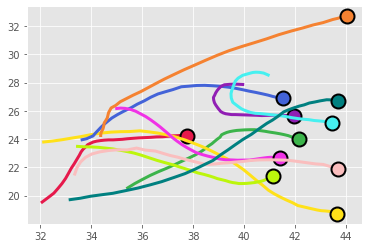

In [46]:
def plot_pocket(pocket_tracking, plays, players, scouting, game_id, play_id):
    f = plt.figure()
    week = get_week_by_gameId(game_id)
    x_y_coords = pocket_tracking[['nflId','x', 'y']]
    records = x_y_coords.to_records(index=False)
    result = list(records)

    x_y_coords_list = result
    nflIds = []
    

    for i in x_y_coords_list:
        nflIds.append(i[0])

    
    nflIds = np.array(nflIds)
    nflIds = np.unique(nflIds)
    print("nflids: ", nflIds)
    
    colors_list = [ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000', '#ff0000', '#808080']
    for count,k in enumerate(nflIds):
        coords = get_coords(week, k, play_id, game_id) #lookup player coords for play, k=nflId
        coords = list(coords)
        data = np.asarray(coords)
        plt.plot(*data.T, color=colors_list[count], linewidth=3)
        plt.plot(*data[0], color=colors_list[count], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')
        

    return f 
    
    
    
#Testing    
all_game_plays_team = all_plays_per_game(2021090900, 'TB')
scouting = scouting_in_game(97, 2021090900)
week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(week, 97, 2021090900)    
pocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 97, 2021090900, 'all')
plot_pocket(pocket_tracking, plays, players, scouting, 2021090900, 97).show()

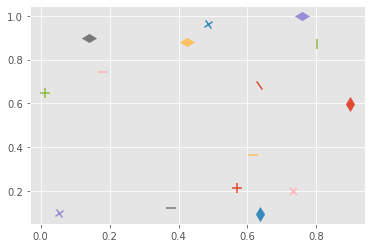

In [47]:
#  https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

for m in ['d', '+', '|']:

    for i in range(5):
        a1, a2  = np.random.random(2)
        angle = np.random.choice([180, 45, 90, 35])

        # make a markerstyle class instance and modify its transform prop
        t = mpl.markers.MarkerStyle(marker=m)
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter((a1), (a2), marker=t, s=100)

nflids:  [25511. 35481. 35634. 40151. 41233. 41363. 42377. 42404. 43306. 43478.
 44816. 44892. 44896. 44904. 44962. 46163. 46185. 47996. 52421. 52459.
 53441. 53621.]


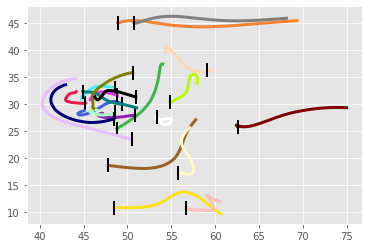

In [48]:
def plot_orientation_pocket(pocket_tracking, plays, players, scouting, game_id, play_id):
    f = plt.figure()
    week = get_week_by_gameId(game_id)
    x_y_coords = pocket_tracking[['nflId','x', 'y']]
    records = x_y_coords.to_records(index=False)
    result = list(records)
    
    #need to get x,y,dir,o
    x_y_coords_list = result
    nflIds = []
    

    for i in x_y_coords_list:
        nflIds.append(i[0])

    
    nflIds = np.array(nflIds)
    nflIds = np.unique(nflIds)
    print("nflids: ", nflIds)
    
    colors_list = [ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000', '#ff0000', '#808080']
    for count,k in enumerate(nflIds):
        coords = get_coords(week, k, play_id, game_id) #lookup player coords for play, k=nflId
        coords = list(coords)
        data = np.asarray(coords)
        plt.plot(*data.T, color=colors_list[count], linewidth=3)
        plt.plot(*data[0], color=colors_list[count], marker='|', markersize=14, markeredgewidth=2, markeredgecolor='#000000')
        

    return f
 
    
    
#Testing    
all_game_plays_team = all_plays_per_game(2021090900, 'TB')
scouting = scouting_in_game(480, 2021090900)
week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(week, 480, 2021090900)    
#pocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 97, 2021090900, 'all')
pocket_tracking = get_tracking_data(2021090900, 480, 'TB', 1, 'C')
#print(pocket_tracking)
plot_orientation_pocket(pocket_tracking, plays, players, scouting, 2021090900, 480).show()


In [49]:
#original animation code
'''
game_id = 2021090900
play_id = 97

all_game_plays_team = all_plays_per_game(2021090900, 'TB')
scouting = scouting_in_game(97, 2021090900)
week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(week, 97, 2021090900)    
pocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 97, 2021090900, 'all')

week = get_week_by_gameId(game_id)
x_y_coords = pocket_tracking[['nflId','x', 'y']]
records = x_y_coords.to_records(index=False)
result = list(records)

x_y_coords_list = result
nflIds = []

for i in x_y_coords_list:
    nflIds.append(i[0])

frame_cnt = len(x_y_coords_list)
print("Frame cnt: ", frame_cnt)    
nflIds = np.array(nflIds)
nflIds = np.unique(nflIds)
#print("nflids: ", nflIds)
    
colors_list = [ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000', '#ff0000', '#808080']

#need to get a list of nflIds for all QB,OL,DL 
coords = get_coords(week, 25511, play_id, game_id) #lookup player coords for play, k=nflId
coords_copy = coords

frame_cnt = len(coords)
print("Frame cnt coords: ", frame_cnt)

x_data = []
y_data = []

fig, ax = plt.subplots()
#need to get min/max of x and y for xlim,ylim
ax.set_xlim(0, 120)
ax.set_ylim(0, 53)
line, = ax.plot(0, 0) 
#print(x_data)
#print(y_data)

def animation_frame(i):  
    #test if you can retrieve coords and other data from within animatioN_frame()
    x_data.append(coords_copy[int(i)][0])
    y_data.append(coords_copy[int(i)][1])
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line,
    

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, frame_cnt, 1), interval=1) 
#animation = FuncAnimation(fig, func=animation_frame(0, 'hello world'), frames=np.arange(0, frame_cnt, .1), interval=100) #super slo motion


from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=10, metadata={'artist': 'Me'}, bitrate=1800)

animation.save('Line Graph Animation2.mp4', writer)
'''


'\ngame_id = 2021090900\nplay_id = 97\n\nall_game_plays_team = all_plays_per_game(2021090900, \'TB\')\nscouting = scouting_in_game(97, 2021090900)\nweek = get_week_by_gameId(2021090900)\ntracking = tracking_for_play(week, 97, 2021090900)    \npocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, 97, 2021090900, \'all\')\n\nweek = get_week_by_gameId(game_id)\nx_y_coords = pocket_tracking[[\'nflId\',\'x\', \'y\']]\nrecords = x_y_coords.to_records(index=False)\nresult = list(records)\n\nx_y_coords_list = result\nnflIds = []\n\nfor i in x_y_coords_list:\n    nflIds.append(i[0])\n\nframe_cnt = len(x_y_coords_list)\nprint("Frame cnt: ", frame_cnt)    \nnflIds = np.array(nflIds)\nnflIds = np.unique(nflIds)\n#print("nflids: ", nflIds)\n    \ncolors_list = [ \'#e6194b\', \'#3cb44b\', \'#ffe119\', \'#4363d8\', \'#f58231\', \'#911eb4\', \'#46f0f0\', \'#f032e6\', \'#bcf60c\', \'#fabebe\', \'#008080\', \'#e6beff\', \'#9a6324\', \'#fffac8\', \'#800000\', \'#aaffc3\

data frames:  40
data dict:  10
{1: ((45.19, 30.09, 92.63), (45.18, 30.09, 92.63), (45.16, 30.08, 91.4), (45.14, 30.08, 92.45), (45.13, 30.08, 94.42), (45.11, 30.09, 95.87), (45.07, 30.09, 97.89), (45.0, 30.09, 100.04), (44.87, 30.09, 101.96), (44.68, 30.12, 101.96), (44.46, 30.13, 103.24), (44.22, 30.17, 105.17), (43.98, 30.21, 107.83), (43.73, 30.25, 111.3), (43.5, 30.31, 116.39), (43.31, 30.39, 121.33), (43.13, 30.47, 123.87), (43.04, 30.55, 130.0), (42.97, 30.65, 134.48), (42.94, 30.76, 138.68), (42.94, 30.87, 147.81), (42.97, 30.98, 153.05), (43.0, 31.09, 161.06), (43.05, 31.21, 168.22), (43.09, 31.33, 178.04), (43.14, 31.45, 185.18), (43.19, 31.56, 191.96), (43.26, 31.67, 196.72), (43.34, 31.77, 203.12), (43.43, 31.86, 204.92), (43.53, 31.94, 200.6), (43.63, 31.97, 195.05), (43.72, 32.01, 182.14), (43.82, 32.04, 166.74), (43.91, 32.07, 160.99), (43.98, 32.1, 136.74), (44.05, 32.13, 120.04), (44.11, 32.17, 107.71), (44.14, 32.21, 106.34), (44.16, 32.26, 106.34)), 2: ((49.34, 30.0,

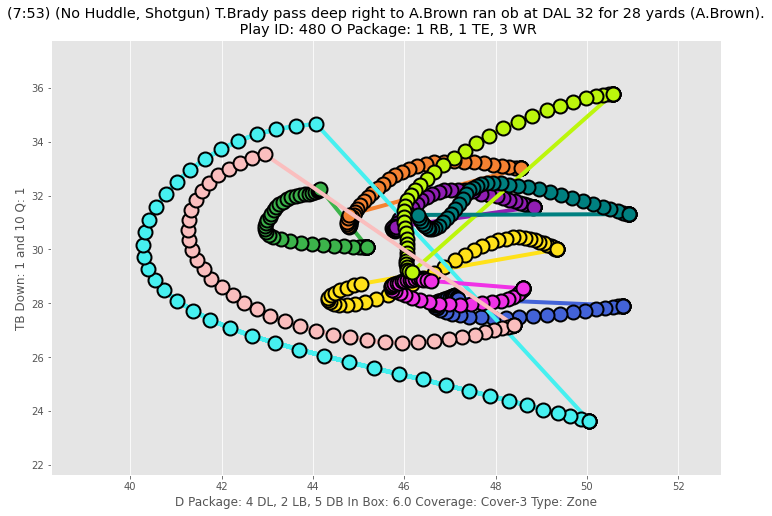

In [88]:
#  https://stackoverflow.com/questions/63901823/matplotlib-animation-passing-variables-through-funcanimation
from functools import partial
import matplotlib as mpl



game_id = 2021090900

week = get_week_by_gameId(game_id)


#need a query to get nflIds of OL, QB, DL for play in game, then iterate through to clip for relevant data
#select DISTINCT(nflId) from pffScoutingData as sd where sd.playId = 97 and sd.gameId = 2021090900 AND sd.pff_role IN ('Pass Block', 'Pass Rush', 'Pass') 

#helper function convert list element to string

def tracking_by_nfl_id_limit(game_id, play_id, nfl_id, week, event):
    #event: 'ball_snap', 'pass_forward'

    sql = """select rowid from week""" + str(week) + """ as wk 
             where wk.gameid = """ + str(game_id) + """  
             AND wk.playId = """ + str(play_id) + """ 
             AND wk.nflId = """ + str(nfl_id) + """
             AND wk.event = '""" + event + """'
          """
    #print(sql)
    query = pd.read_sql_query(sql, con) 
    result = query['rowid'].tolist()
    #sometimes there are data errors missing 'pass_forward' or 'ball_snap' skip those plays
    if len(result) == 0:
        return None

    result = result[0]
    return result


def tracking_by_nfl_id(game_id, play_id, nfl_id, week, start_limit, end_limit):

    start_limit = start_limit - end_limit
    upper = end_limit + 1
    lower = 6 - 1
    sql = """select plays.passResult, wk.playId, wk.gameId, wk.nflId, wk.frameId, wk.time, wk.x, 
             wk.y, wk.s, wk.a, wk.dis, wk.o, wk.dir, wk.event from plays, week""" + str(week) + """ as wk 
             where plays.gameid = """ + str(game_id) + """  
             AND plays.playId = """ + str(play_id) + """   
			       AND wk.nflId = """ + str(nfl_id) + """ 
             AND plays.playId = wk.playId 
             AND plays.gameId = wk.gameId 
             AND wk.team != 'football'
			       LIMIT """ + str(lower) + """,""" + str(upper) + """ 
          """
    #print(sql)
    query = pd.read_sql_query(sql, con)
    return query

def get_play_info(game_id, play_id):
    sql = """select * from games, plays where games.gameId = 2021090900 AND plays.gameID = """ + str(game_id) + """  
        AND plays.playId = """+ str(play_id) + """
          """
    #print(sql)
    query = pd.read_sql_query(sql, con)
    return query

  #select * from games, plays where games.gameId = 2021090900 AND plays.gameID = 2021090900 AND plays.playId = 97


#get tracking data for each play by passResult
def get_animation_data(game_id, play_id, week):
    #game_id (int), play_id (int), team (str) i.e. 'TB', week (int), pass_result (int; 0,1), penalty (int:0,1)

    sql = """select DISTINCT(nflId) from pffScoutingData as sd where sd.playId = """ + str(play_id) + """ and sd.gameId = """ + str(game_id) + """
             AND sd.pff_role IN ('Pass Block', 'Pass Rush', 'Pass')
    """
    #iterate through nflIds, run query to retieve x,y,etc
    query = pd.read_sql_query(sql, con)

    records = query.to_records(index=False)
    result = list(records)

    x_y_coords_list = result
    nflIds = []
    coords_tuple = ()
    data_dict = {}
    x_data = []
    y_data = []

    k = 1
    for i in x_y_coords_list:
        key = k
        k += 1
        nflIds.append(i[0])
        player_id = i[0] #nflId

        start_limit = tracking_by_nfl_id_limit(game_id, play_id, player_id, week, 'ball_snap')
        if start_limit is None:
            continue
    
        end_limit = tracking_by_nfl_id_limit(game_id, play_id, player_id, week, 'pass_forward')
        if end_limit is None:
            continue

        tracking_records = tracking_by_nfl_id(game_id, play_id, player_id, week, start_limit, end_limit)
        frame_counter = len(tracking_records)
        data_dict_tuple = ()
        tracking_records = tracking_records[['x', 'y', 'o']]
        for index, row in tracking_records.iterrows():
            x = row["x"]
            y = row["y"]
            o = row["o"]
            coords = x,y,o
            coords_tuple = list(coords_tuple)
            coords_tuple.append(coords)
            data_dict_tuple = list(data_dict_tuple)
            data_dict_tuple.append(coords)
            coords_tuple = tuple(coords_tuple)
            data_dict_tuple = tuple(data_dict_tuple)
            x_data.append(x)
            y_data.append(y)
            
        data_dict[key] = data_dict_tuple

    return coords_tuple, frame_counter, data_dict, play_id, game_id, x_data, y_data
# end of function get_animation_data() #############################################

''''
          #ax.plot(x1, y1, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')
          #ax.lines.set_marker(None)
          #ax.plot.set_marker(None)
          #for line in ax.lines:
          #    print(line)
              #line.set_marker(None)
              #ax.plot(x1, y1, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')


'''

x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22 = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [] 
y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22 = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [] 
o1 = []

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.style.use("ggplot")

colors_list = [ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000', '#ff0000', '#808080']

xy_data, frames, data_dict, play_id, game_id, x_data, y_data = get_animation_data(2021090900, 480, 1) #returns a tuple of coords 

play_info = get_play_info(game_id, play_id)
#print(play_info)
play_description = play_info.iloc[0]['playDescription']
quarter = play_info.iloc[0]['quarter']
down = play_info.iloc[0]['down']
yards_to_go = play_info.iloc[0]['yardsToGo']
possession_team = play_info.iloc[0]['possessionTeam']
personnel_o = play_info.iloc[0]['personnelO']
personnel_d = play_info.iloc[0]['personnelD']
defenders_in_box = play_info.iloc[0]['defendersInBox']
pff_pass_coverage = play_info.iloc[0]['pff_passCoverage']
pff_pass_coverage_type = play_info.iloc[0]['pff_passCoverageType']


ax.set(title = play_description + "\n Play ID: " + str(play_id) + " O Package: "+personnel_o,
       xlabel = "D Package: " + personnel_d + " In Box: " + str(defenders_in_box) + " Coverage: " + pff_pass_coverage + " Type: "+pff_pass_coverage_type,
       ylabel = possession_team + " Down: " + str(down) + " and " + str(yards_to_go) + " Q: " + str(quarter)
       )

coords_xy = xy_data

max_val_x = max(x_data)
min_val_x = min(x_data)
max_val_y = max(y_data)
min_val_y = min(y_data)
ax.set_xlim(min_val_x-2, max_val_x+2)
ax.set_ylim(min_val_y-2, max_val_y+2)
ax.grid(axis='y')


data_frames = frames
frame_cnt = len(coords_xy)
print("data frames: ", data_frames)
print("data dict: ", len(data_dict))
print(data_dict)



def animation_frame(i, coords_xy, data_dict, data_frames):  
    #  https://www.geeksforgeeks.org/matplotlib-animate-multiple-lines/
    data_dict_len = len(data_dict)
    #iterate through data_dict and append to x[key], y[key], l1 is value

    #rotate markers to show orientation
    #t = mpl.markers.MarkerStyle(marker='-')
    #t._transform = t.get_transform().rotate_deg(angle)
    
    for k, v in data_dict.items():
        
        if(k == 1):
          data_copy = v
          data_copy = list(data_copy)
          x1.append(data_copy[i][0])
          y1.append(data_copy[i][1])
          o1.append(int(data_copy[i][2]))
          ax.plot(x1, y1, color=colors_list[k], linewidth=4)
          #ax.plot(x1, y1, marker=(3, 0, o1))
          #t = mpl.markers.MarkerStyle(marker='D')
          #t._transform = t.get_transform().rotate_deg(o1)
          #ax.scatter(x1, y1, color=colors_list[k], marker=t)
          #ax.annotate("This is an annotation", xy=(0.1, 0.1), xytext=(0, 0.6), arrowprops={"arrowstyle":"->", "color":"gray"})
          if(i == 0):
              ax.plot(x1, y1, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 2):
          data_copy = v
          data_copy = list(data_copy)
          x2.append(data_copy[i][0])
          y2.append(data_copy[i][1])
          ax.plot(x2, y2, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x2, y2, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 3):
          data_copy = v
          data_copy = list(data_copy)
          x3.append(data_copy[i][0])
          y3.append(data_copy[i][1])
          ax.plot(x3, y3, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x3, y3, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 4):
          data_copy = v
          data_copy = list(data_copy)
          x4.append(data_copy[i][0])
          y4.append(data_copy[i][1])
          ax.plot(x4, y4, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x4, y4, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 5):
          data_copy = v
          data_copy = list(data_copy)
          x5.append(data_copy[i][0])
          y5.append(data_copy[i][1])
          ax.plot(x5, y5, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x5, y5, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 6):
          data_copy = v
          data_copy = list(data_copy)
          x6.append(data_copy[i][0])
          y6.append(data_copy[i][1])
          ax.plot(x6, y6, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x6, y6, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 7):
          data_copy = v
          data_copy = list(data_copy)
          x7.append(data_copy[i][0])
          y7.append(data_copy[i][1])
          ax.plot(x7, y7, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x7, y7, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 8):
          data_copy = v
          data_copy = list(data_copy)
          x8.append(data_copy[i][0])
          y8.append(data_copy[i][1])
          ax.plot(x8, y8, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x8, y8, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 9):
          data_copy = v
          data_copy = list(data_copy)
          x9.append(data_copy[i][0])
          y9.append(data_copy[i][1])
          ax.plot(x9, y9, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x9, y9, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 10):
          data_copy = v
          data_copy = list(data_copy)
          x10.append(data_copy[i][0])
          y10.append(data_copy[i][1])
          ax.plot(x10, y10, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x10, y10, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')

        if(k == 11):
          data_copy = v
          data_copy = list(data_copy)
          x11.append(data_copy[i][0])
          y11.append(data_copy[i][1])
          ax.plot(x11, y11, color=colors_list[k], linewidth=4)
          if(i == 0):
              ax.plot(x11, y11, color=colors_list[k], marker='o', markersize=14, markeredgewidth=2, markeredgecolor='#000000')
         

ani = FuncAnimation(fig,func=partial(animation_frame, coords_xy=xy_data, data_dict=data_dict, data_frames=data_frames), frames=np.arange(0, data_frames, 1), interval=1)
#ani = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, frame_cnt, 1), interval=1)

from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=10, metadata={'artist': 'Michael Joseph McCarron'}, bitrate=1800)

ani.save(str(game_id) + '_' + str(play_id) + '.mp4', writer)


10
[[0, 0, 70], [0, 0, 40]]
Line2D(_line0)


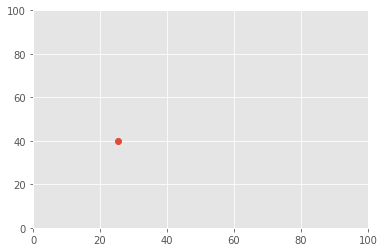

10
[[0, 0.0, 70.0], [-9.81, -9.81, 25.285]]
Line2D(_line0)
10
[[0, 0.0, 70.0], [-9.81, -19.62, 0.759999999999998]]
Line2D(_line0)
20
[[0, 0.0, 70.0], [-9.81, -29.43, -33.575]]
Line2D(_line0)


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def DEM(step, ball_1, ball_1_plot):
    TS = step/10
    
    print(step)
    print(ball_1)
    print(ball_1_plot)

    # Ball_1
    # Contact
    grav = -9.81

    # Acceleration
    acc_x = 0
    acc_y = grav

    # Velocity
    vel_x = ball_1[0][1] + acc_x*TS
    vel_y = ball_1[1][1] + acc_y*TS

    # Position
    pos_x = vel_x * TS + 0.5 * acc_x * TS * TS  + ball_1[0][2]
    pos_y = vel_y * TS + 0.5 * acc_y * TS * TS  + ball_1[1][2]

    # Update
    ball_1[0] = [acc_x,vel_x,pos_x]
    ball_1[1] = [acc_y,vel_y,pos_y]

    # Update animation
    ball_1_plot.set_xdata(ball_1[0][2])
    ball_1_plot.set_xdata(ball_1[1][2])

    return ball_1_plot,

def main():
    from functools import partial

    fig, ax = plt.subplots()
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)

    #         acc,vel,disp (x,y)
    ball_1 = [[0,0,70],[0,0,40]]
    ball_1_plot, = ax.plot(ball_1[0][2],ball_1[1][2], "o")

    animation_run = FuncAnimation(fig,func=partial(DEM, ball_1=ball_1, ball_1_plot=ball_1_plot), frames=[10,20], interval=10)
    plt.show()
    
    from matplotlib.animation import writers
    Writer = writers['ffmpeg']
    writer = Writer(fps=10, metadata={'artist': 'Me'}, bitrate=1800)

    animation_run.save('ball_test.mp4', writer)

if __name__ == '__main__':
    main()


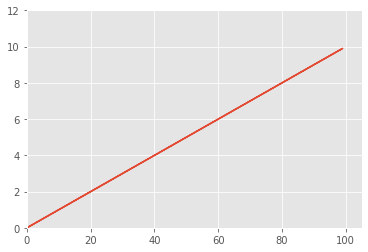

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers

x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0, 105)
ax.set_ylim(0, 12)
line, = ax.plot(0, 0)

def animation_frame(i):
    x_data.append(i * 10)
    y_data.append(i)

    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line, 

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 10, 0.1), interval=10)

# setting up wrtiers object
Writer = writers['ffmpeg']
writer = Writer(fps=15, metadata={'artist': 'Me'}, bitrate=1800)

animation.save('Line Graph Animation.mp4', writer)

plt.show()

# **DATA AGGREGATION**

In [54]:
################# Tracking Data for all plays in a Game for QB, OL ################################
#this cell will give us all the tracking and plots per Game


#creata a list of all games, get teams for that game: games.homeTeamAbbr, visitorTeamAbbr put into 2 element list, team1, team2
write_game_id = 2021090900
write_team = 'DAL'
all_game_plays_team = all_plays_per_game(write_game_id, write_team)
os.makedirs(save_dir + str(write_game_id) + '/' + write_team + '/')
print("number of plays in game for team:")
print(len(all_game_plays_team))

#need to set up different tracks for C,I,IN,S,R pass plays for accurate metrics, then run each track

all_game_plays_team = all_game_plays_team.reset_index()  # make sure indexes pair with number of rows
#iterate through the returned pandas dataframe and get dataframes for scouting and tracking
for index, row in all_game_plays_team.iterrows():
    # now get scouting and tracking fore each playId in a game
    print("Play ID: ", row["playId"])
    scouting = scouting_in_game(row["playId"], row["gameId"])
    #look up the week id for the game id in games table
    game_week = get_week_by_gameId(row["gameId"])
    tracking = tracking_for_play(game_week, row["playId"], row["gameId"])
    #now plot the x,y,o,s of tracking for OL, QB and DL per play per game
    pocket_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, row["playId"], row["gameId"], 'all')
    #plot all players per play per game per team
    plot_no = index + 1
    print(f"Plot no. {plot_no} of {len(all_game_plays_team)}")
    
    #plot OL, DL and QB per play per game
    #OL_tracking(tracking,all_game_plays_team,players,scouting, row["gameId"],row["playId"]).show()
    #plot_pocket(pocket_tracking, plays, players, scouting, row['gameId'], row['playId']).show()
    plot_pocket(pocket_tracking, plays, players, scouting, row['gameId'], row['playId']).savefig(save_dir + str(row['gameId']) + '/' + write_team + '/' + str(row['playId']) + '.png')
    #need to save each pocket plot to a directory of gameid, team, playid.png
    
    pocket_metric_tracking = pocket_tracking_vectors(tracking,all_game_plays_team,players,scouting, row["playId"], row["gameId"], 'offense')
    pocket_metric_prep(pocket_metric_tracking, row['gameId'], row["playId"])
    
    
    
    # two main groupings 1. success  2. unsuccesful pocket formation maintenance
    #compute bounding box for OL, QB for completed passes and the hull values
    #compute optimal distance b/w QB and OL for a completed pass
    #compute optimal time lapse from snap to throw for completed pass
    #compute half hull for OL, QB, track best pocket formation of pocket for completed passes 
    #compute mean distance from QB to OL points, which OL players are best at maintaining optimal distance
    #compute time to collapse pocket on unsuccesful plays
    #compute mass and speed variables in OL vs DL per match up, also calculate forces involved
    #calculate torsion of edge rushers, centrifugal forces involved
    #how movement of center in relation to QB, then iterate for each OL in relation to QB, reference from line of scrimmage
    
    
    




FileExistsError: ignored

In [ ]:
################# Tracking Data for all plays in a Game for Defensive Line ############################






In [ ]:
################# Tracking Data for all plays in all games for QB, OL ################################




In [ ]:
################# Tracking Data for all plays in a Game for Defensive Line ############################

